In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('data/titanic/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
y = titanic_data.Survived

In [8]:
X = pd.get_dummies(X)

In [9]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
X = X.fillna({'Age': X.Age.median()})

In [11]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train.shape

(596, 10)

In [18]:
X_test.shape

(295, 10)

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
clf.score(X_train, y_train)

0.9798657718120806

In [21]:
clf.score(X_test, y_test)

0.7796610169491526

In [22]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
clf.score(X_train, y_train)

0.8238255033557047

In [25]:
clf.score(X_test, y_test)

0.8203389830508474

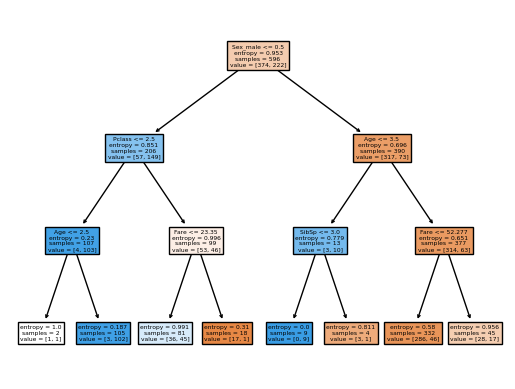

In [26]:
a = tree.plot_tree(clf, filled=True, feature_names=X.columns)

In [27]:
max_depth_values = range(1,100)

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
scores_data = pd.DataFrame()

In [30]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({
        'max_depth':[max_depth], 
        'train_score':[train_score], 
        'test_score':[test_score], 
        'cross_val_score':[mean_cross_val_score]
    })
    scores_data = pd.concat([scores_data, temp_score_data])

In [31]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score','test_score','cross_val_score'], var_name='set_type', value_name='score')

In [32]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.770196
293,96,cross_val_score,0.763473
294,97,cross_val_score,0.768515
295,98,cross_val_score,0.773557


<Axes: xlabel='max_depth', ylabel='score'>

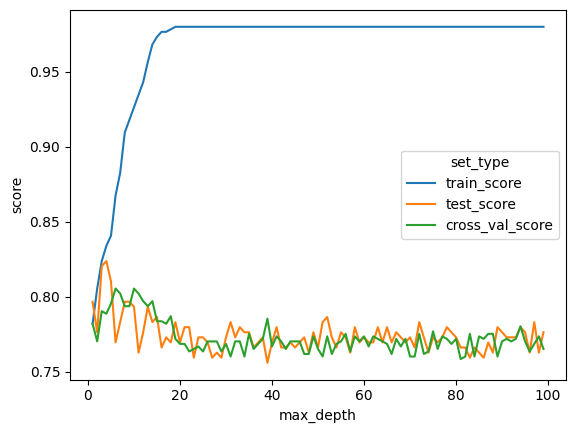

In [33]:
sns.lineplot(scores_data_long, x='max_depth', y='score', hue='set_type')

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [36]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
clf = tree.DecisionTreeClassifier()

In [39]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [40]:
parametrs = {'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}

In [41]:
grid_search_clf = GridSearchCV(clf, parametrs, cv=5)

In [42]:
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [43]:
grid_search_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [44]:
grid_search_clf.best_estimator_.score(X_test, y_test)

0.7661016949152543

In [45]:
from sklearn.metrics import precision_recall_fscore_support

In [46]:
y_pred = grid_search_clf.best_estimator_.predict(X_test)

In [47]:
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.7931034482758621, 0.575, 0.6666666666666666, None)

In [48]:
y_pred_prob = grid_search_clf.best_estimator_.predict_proba(X_test)

<Axes: >

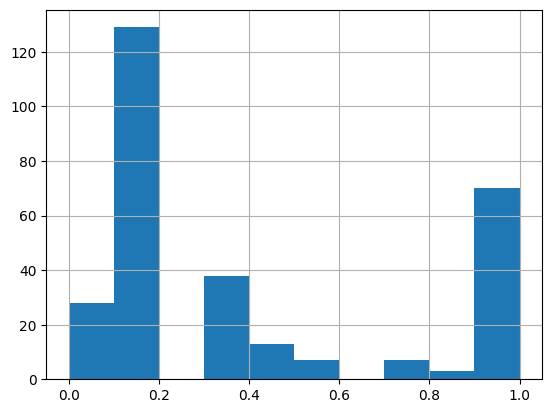

In [49]:
pd.Series(y_pred_prob[:,1]).hist()

In [50]:
import numpy as np

In [51]:
y_pred = np.where(y_pred_prob[:,1] > 0.8, 1, 0)

In [52]:
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.8493150684931506, 0.5166666666666667, 0.6424870466321243, None)

In [53]:
y_pred = np.where(y_pred_prob[:,1] > 0.2, 1, 0)

In [54]:
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.7318840579710145, 0.8416666666666667, 0.7829457364341085, None)

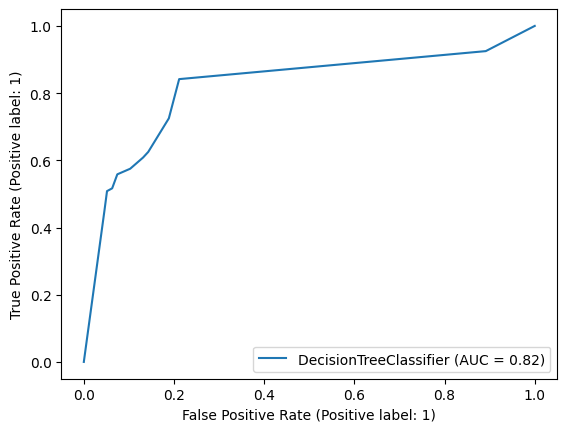

In [55]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

svc_disp = RocCurveDisplay.from_estimator(grid_search_clf.best_estimator_, X_test, y_test)

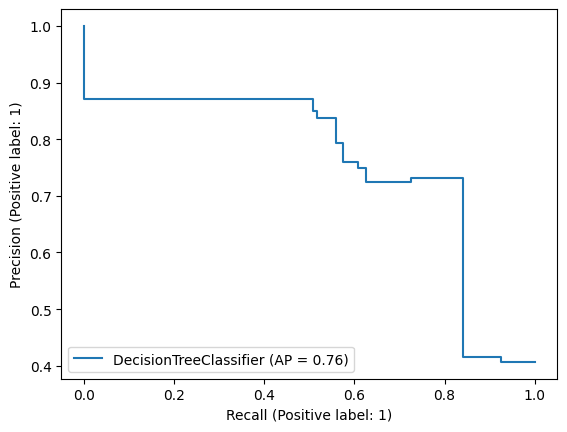

In [56]:
svc_disp1 = PrecisionRecallDisplay.from_estimator(grid_search_clf.best_estimator_, X_test, y_test)

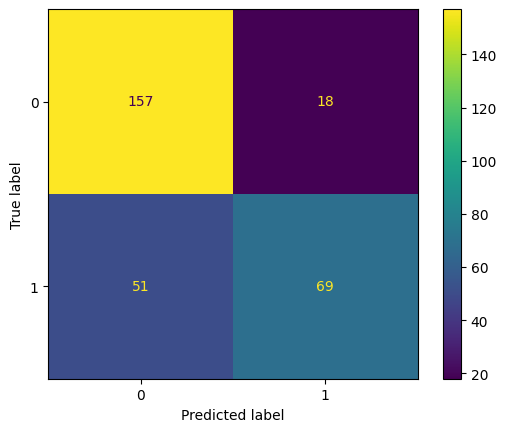

In [57]:
svc_disp2 = ConfusionMatrixDisplay.from_estimator(grid_search_clf.best_estimator_, X_test, y_test)